A notebook for describing and demonstrating the creation of a new spectral library, the placement of the library in the data/spectral_library directory, and the sampling of the spectral library into a new MaterialCollection object.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Overview

The Spectral Parameters Toolkit uses publicly available reflectance spectra of materials, and processes these with the expected spectral response of a given instrument.

In this notebook we describe and demonstrate how to build a spectral library of a set of materials of interest, and how to import this into an sptk.MaterialCollection object, for later processing.

The steps are:

1. Create a new spectral library directory.
2. Create a new MaterialCollection object from the spectral library.
3. Produce a plot of the spectral library.

# Creating a Spectral Library

The first task is to prepare a directory containing files that give the reflectance spectra of the materials of interest, that we can access with sptk.
The steps involved are:
1. Choose a set of materials of interest
2. Source reflectance spectra files for these materials.
3. Put the files in an accessible directory.

## Choosing a set of Materials

In principal sptk is capable of handling any material represented by a dense set of spectral reflectance measurements (i.e. with spectral intervals much less than the band width of the sampling instrument).

The processing performed by the software requires that:
- A 'unique' material can be represented by multiple reflectance spectra files, such that we have a distribution of spectra for a given material.
- Multiple materials can be grouped into labelled classes, so that we can investigate the ability of an instrument to separate arbitrarily defined groups of materials.

When constructing the spectral library we do not need to consider the grouping of multiple materials; this can be achieved during the creation of the MaterialCollection object.

The materials are organised by directories of material names, with each material directory hosting an arbitrary number of reflectance spectra files.

In this example we will construct a spectral library of hematite, basalt and olivine. Notice that these materials include both minerals and rocks, to emphasise that the labelling of 'unique' material directories can be arbitrary.

## Sourcing Material Reflectance Spectra

We recommend sourcing the reflectance spectra for materials from ViSOR, the Western Washington University Visible-Infrared Spectral Browser, that can be accessed here: https://westernreflectancelab.com/visor/.

This resource collects reflectance spectra from a number of different publicly available databases into a standardised format, that can be searched in terms of material type, source library, sample type, wavelength range and more (see [here](https://westernreflectancelab.com/visor/about/) for further details).

Below is the landing page of ViSOR. We have entered our desired material, 'basalt', and have applied the 'require wavelength range' filter to only find files with spectra in the range of 400 - 2500 nm, as we will be interested in how a silicon based multispectral imager, sensitive to the range of 400 - 1100 nm, will sample the data.

![Screenshot of the ViSOR landing page. The 'Sample name' is populated with the word 'basalt' and the 'require wavelength ranges' is populated with selections of 'VIS' and 'NIR'.](imgs/visor_landing_page.png)

The search returns the results page pictured below. We can see that the search has found 58 entries, that we will download and put in a 'basalt' directory of our new spectral library. 

![Screenshot of the ViSOR search results for 'basalt' in the VIS and NIR ranges.](imgs/visor_search_results.png)

We will make a new spectral library called 'example_spectral_library' in the data/spectral_library directory of the local ```sptk''' directory, and within this we make a new directory called 'basalt' as a destination for the files we will download.

You can do this manually via your file explorer, or by running the cell below.

In [2]:
# you can run this code to make the example spectral library directory
from pathlib import Path

# make the example spectral library directory
exmpl_lib = Path("..", "data", "spectral_library", "example_spectral_library")
exmpl_lib.mkdir(parents=True, exist_ok=True)

# make the basalt destination directory
basalt = exmpl_lib / "basalt"
basalt.mkdir(parents=True, exist_ok=True)
# make the hematite destination directory
hematite = exmpl_lib / "hematite"
hematite.mkdir(parents=True, exist_ok=True)
# make the olivine destination directory
olivine = exmpl_lib / "olivine"
olivine.mkdir(parents=True, exist_ok=True)

## Selecting and Downloading the Material Reflectance Spectra Files

The ViSOR search results page lists the matched material reflectance spectra files, giving the file ID, material name, the source 3rd party spectral library, the sample type, the wavelength range, and the size of the sample. The results are displayed in batches of 10. The process for selecting all results of a given search is to Select All, click 'Pick Up', and navigate to the next page, and repeat this until all samples have been selected.

In the bottom left of the screen is a movable icon labelled 'INVENTORY'. Clicking on this shows the selected items, and there is an option to select all of these, and export. Choose for the export to be delivered to the 'data/spectral_library/example_spectral_library/basalt' directory. This will deposit a zip file of the requested data files, that can be extracted here. After extracting the files, delete the original .zip file and the expanded folder of the same name.

Now we repeat the process for the search term 'hematite' and then 'olivine'.

In the example shown in this notebook, we have only selected 20 of the ~>70 hematite samples, for brevity.

# Creating a MaterialCollection Object

Here we will import the example_spectral_library into a new material collection object.



In [3]:
from sptk.material_collection import MaterialCollection

We will group olivine and basalt as material 'A' and label hematite as material 'B'. We denote this by defining a dictionary, the MATERIAL_SET, where we map the 'label' to a list of tuples of materials and sample IDs, or in this case, the wildcard '*' character, instructing the file search process to find all data files for the given material.

In [4]:
MATERIAL_SET = {
    'A': [('basalt', '*'),
            ('olivine', '*')],
    'B': [('hematite', '*')]}

We pass this material set to the MaterialCollection constructor function, below.

As part of the constructor call, we also specify the spectral library to use:

```spectral_library='example_spectral_library'```

and we define a ```project_name```.

In this example we have switched off the 'balance_classes' function, such that all files found in the example spectral library will be loaded here. 'balance_classes' randomly discards entries such that the sizes of the classes in the ```MATERIAL_SET``` are equal.

During execution, the constructor function also produces plots of the spectral library, that are displayed here.

Note that by default the construction process also saves the MaterialCollection DataFrame content to a csv file, and to a pickle format, for quick reloading and analysis by other projects.


Building new sptk_example MaterialCollection DF

basalt: 07SA20-3_0_2296.csv loaded
basalt: 07SA20-3_1_2306.csv loaded
basalt: 09ET01-3_0_2289.csv loaded
basalt: 09ET01-3_1_2299.csv loaded
basalt: 09SV15-4_0_2292.csv loaded
basalt: 09SV15-4_1_2302.csv loaded
basalt: BAS201_14417.csv loaded
basalt: BAS202_14533.csv loaded
basalt: BAS205_13779.csv loaded
basalt: BAS600_0_6842.csv loaded
basalt: BAS600_1_6843.csv loaded
basalt: HAW006_0_6850.csv loaded
basalt: HAW006_11297.csv loaded
basalt: HAW006_1_6851.csv loaded
basalt: HAW006_2_6852.csv loaded
basalt: HAW006_3_6853.csv loaded
basalt: HAW006_4_6854.csv loaded
basalt: HAW006_5_6855.csv loaded
basalt: HAW006_6_6856.csv loaded
basalt: HAW006_7_6857.csv loaded
basalt: HAW006_8_6858.csv loaded
basalt: HAW006_9_6859.csv loaded
basalt: HAW006_f1_12080.csv loaded
basalt: HAW006_f2_12174.csv loaded
basalt: HAW006_f3_12564.csv loaded
basalt: HAW006_f4_13319.csv loaded
basalt: HAW006_f5_13461.csv loaded
basalt: HAW006_f6_14283.csv loaded
basalt:

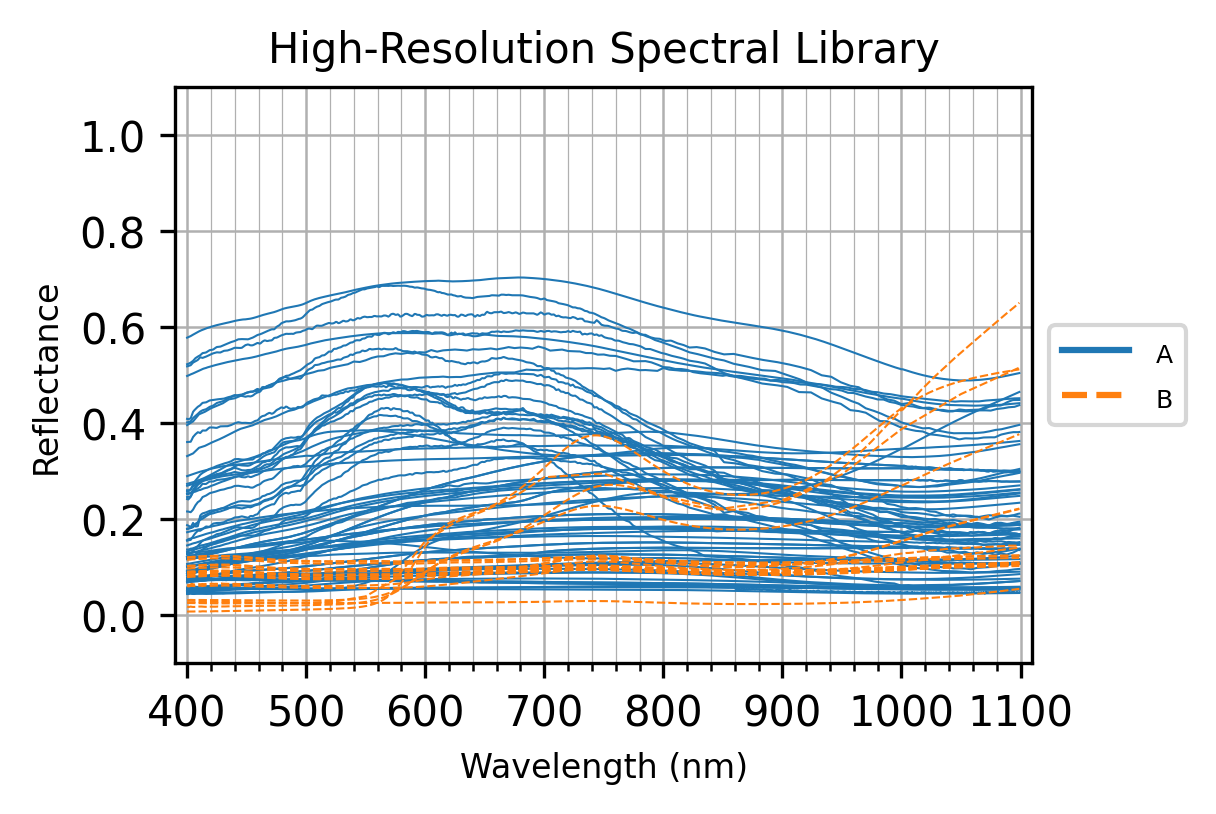

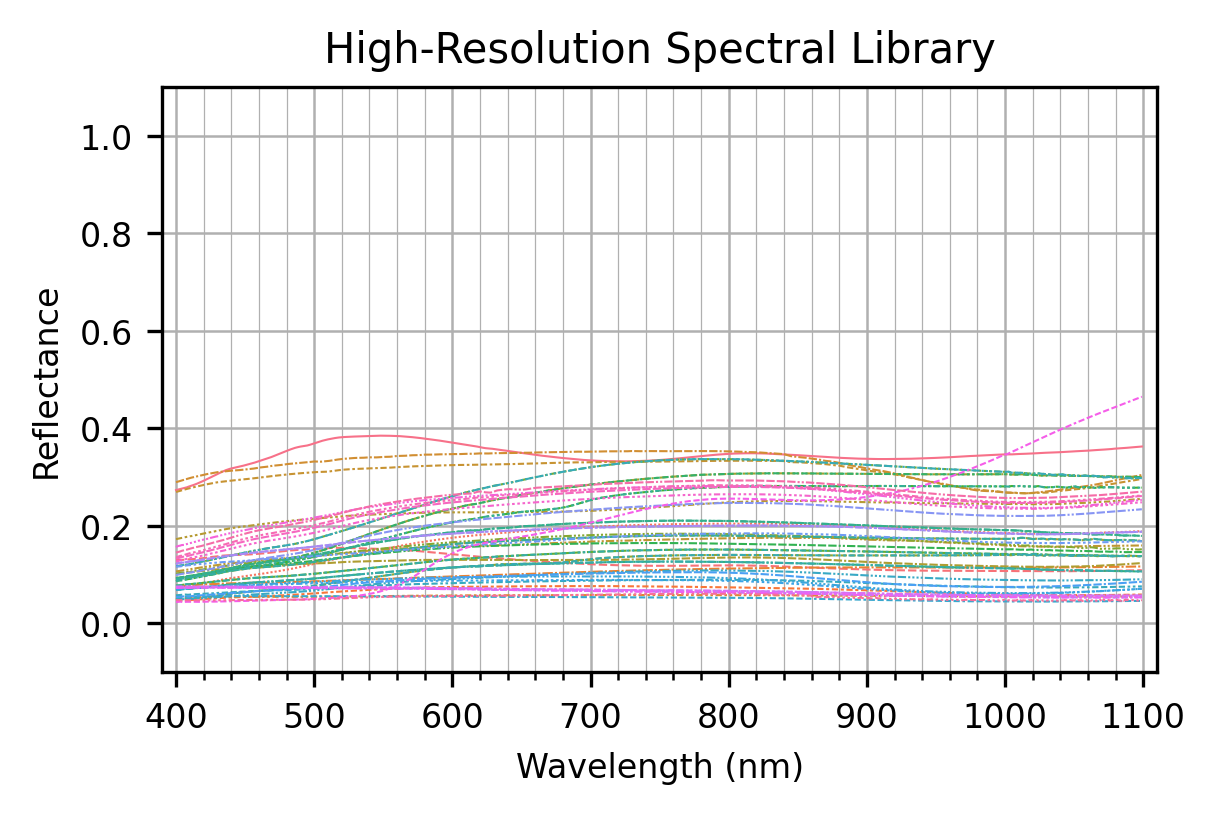

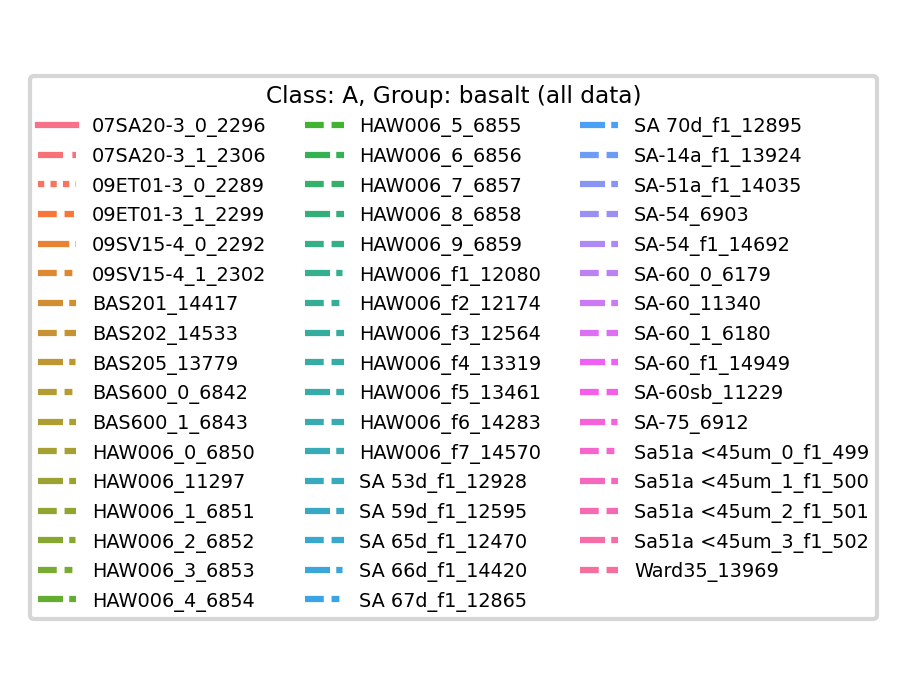

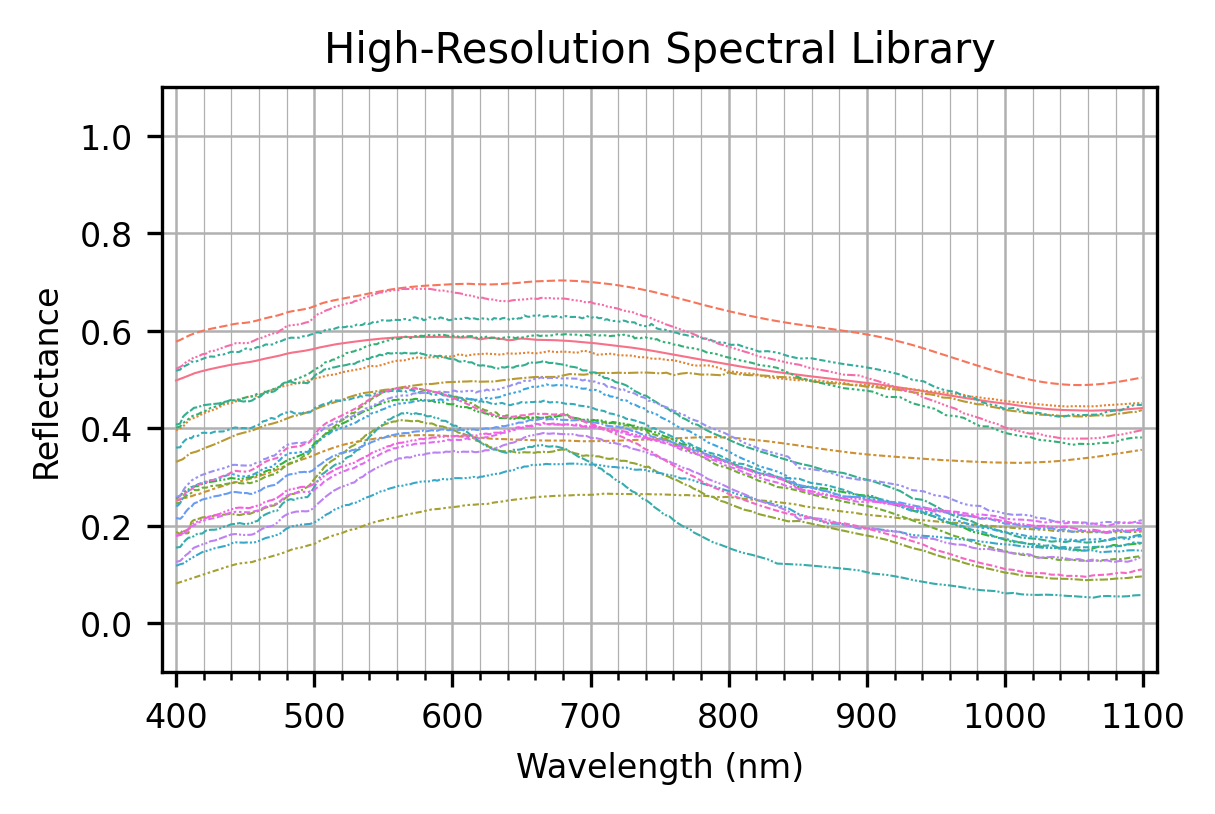

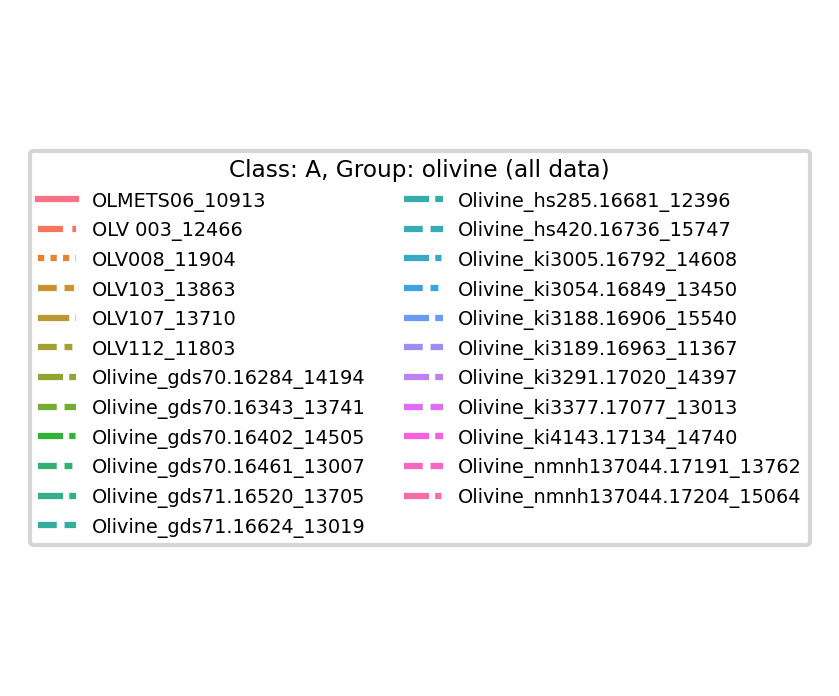

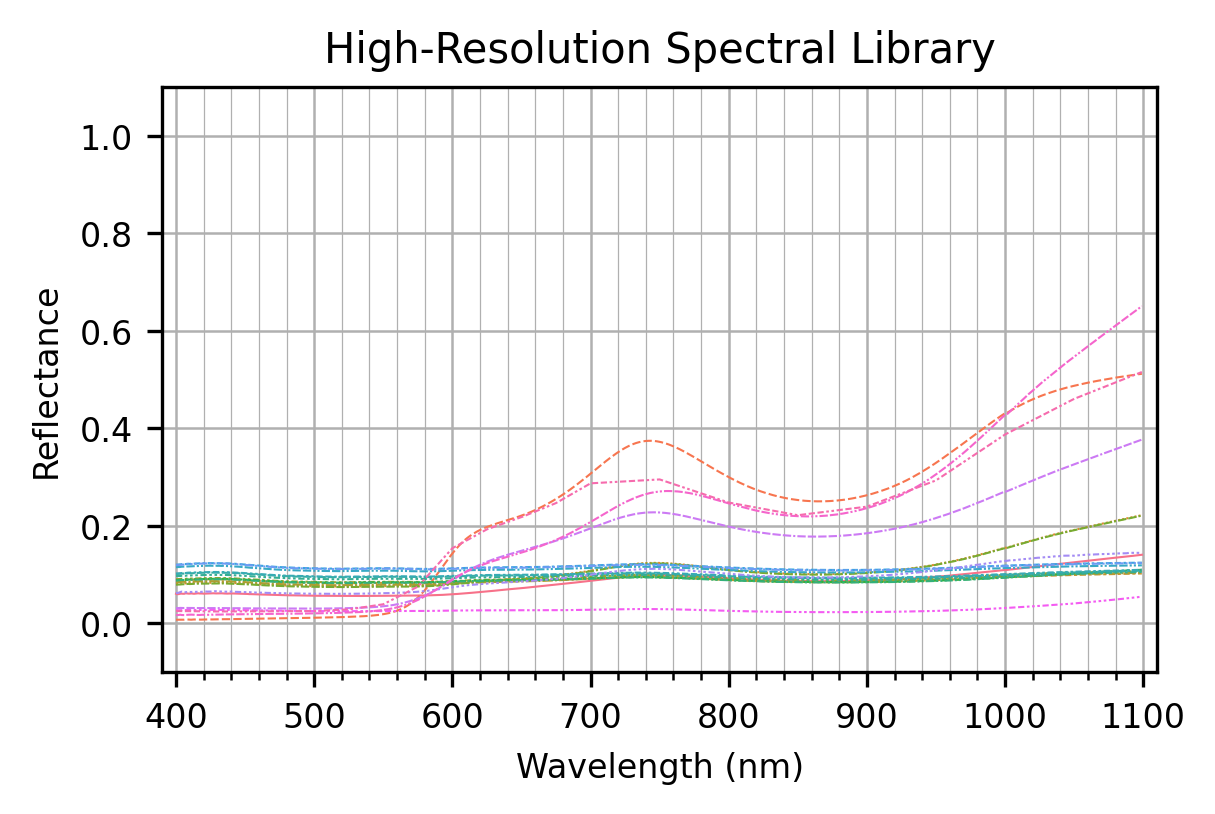

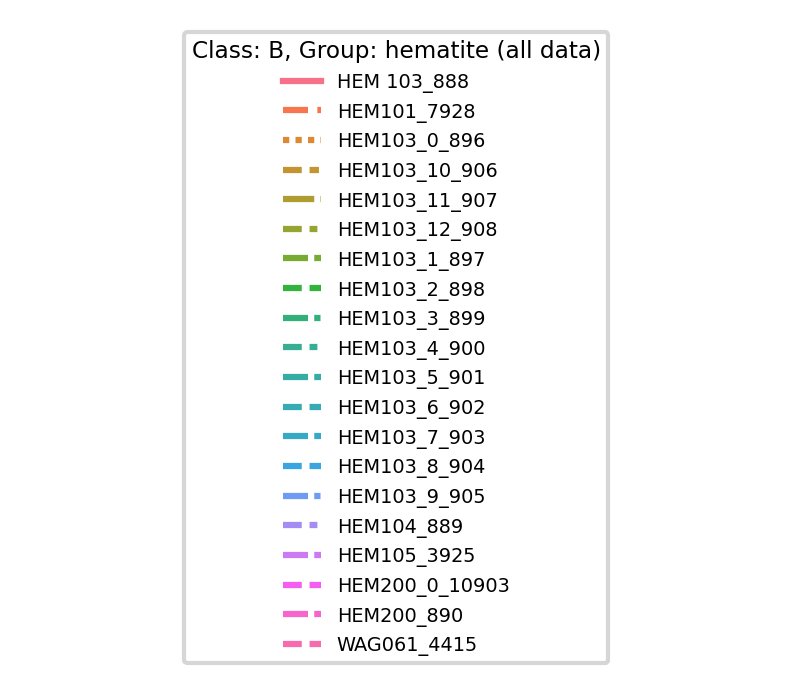

In [5]:
PROJECT_NAME = 'sptk_example'
matcol = MaterialCollection(
            materials=MATERIAL_SET,
            spectral_library='example_spectral_library',
            project_name=PROJECT_NAME,
            balance_classes=False,
            load_existing=False) # save the output for later access

The process of building the library includes resampling each entry to a common spectral range and resolution, that are set in the ```config.py``` file of sptk. In this example we have set the range to 400 -- 1000 nm, and the resolution to 1 nm.

We can check some properties of the loaded material collection, such as the number of entries in the classes, and the number of entries in each constituent material group of each class:

In [6]:
matcol.print_category_entries(print_minerals=True)

Samples in A class: 73
Unique sample sources in A class: 73
  Samples in basalt mineral group: 50
  Samples in olivine mineral group: 23
Samples in B class: 20
Unique sample sources in B class: 20
  Samples in hematite mineral group: 20


# Balancing the mineral groups

We can perform balancing of the classes after the construction, by calling the ```balance_mineral_groups``` method.

In [7]:
matcol.balance_mineral_groups(random_state=0)

Balancing class sizes...


Printing the category entries allows us a quick-check of the new class sizes:

In [8]:
matcol.print_category_entries(print_minerals=True)

Samples in A class: 20
Unique sample sources in A class: 20
  Samples in basalt mineral group: 10
  Samples in olivine mineral group: 10
Samples in B class: 20
Unique sample sources in B class: 20
  Samples in hematite mineral group: 20


and we can reproduce the plots of the relfectance profiles to visually inspect the new material collection:

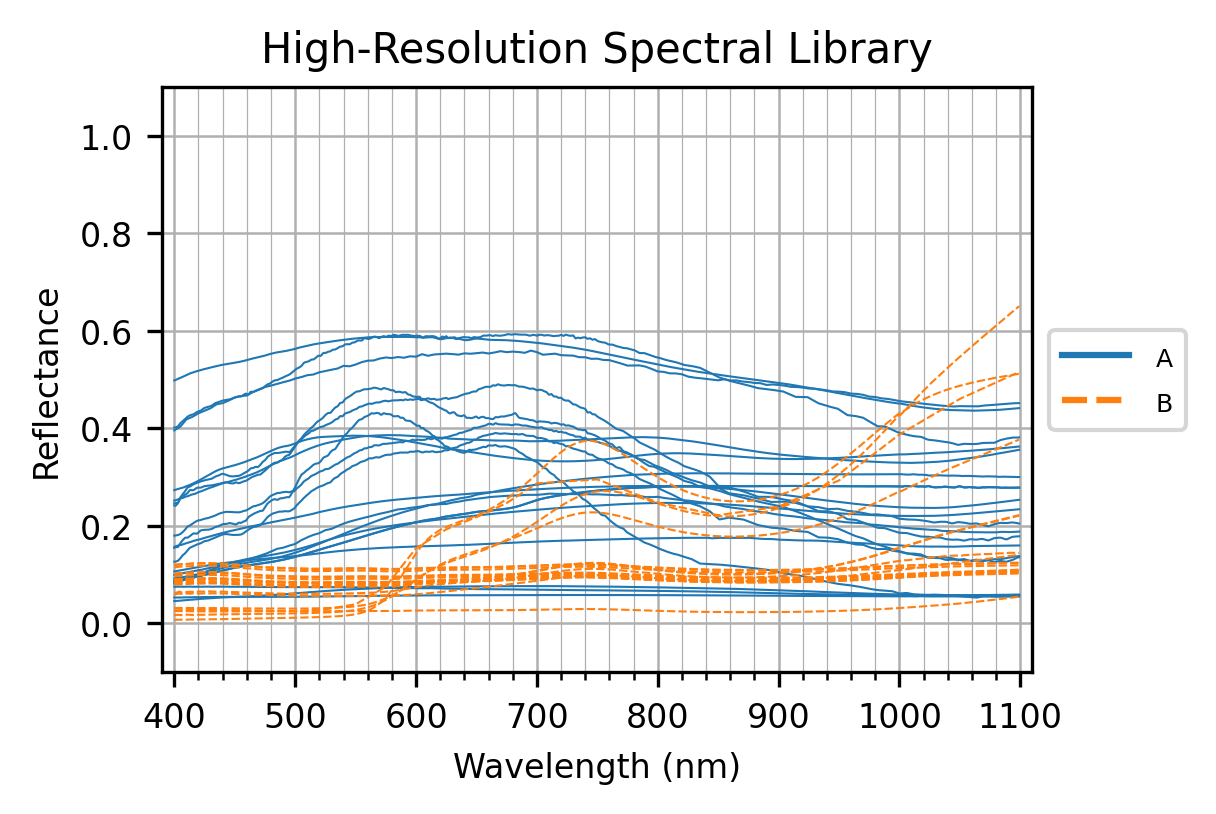

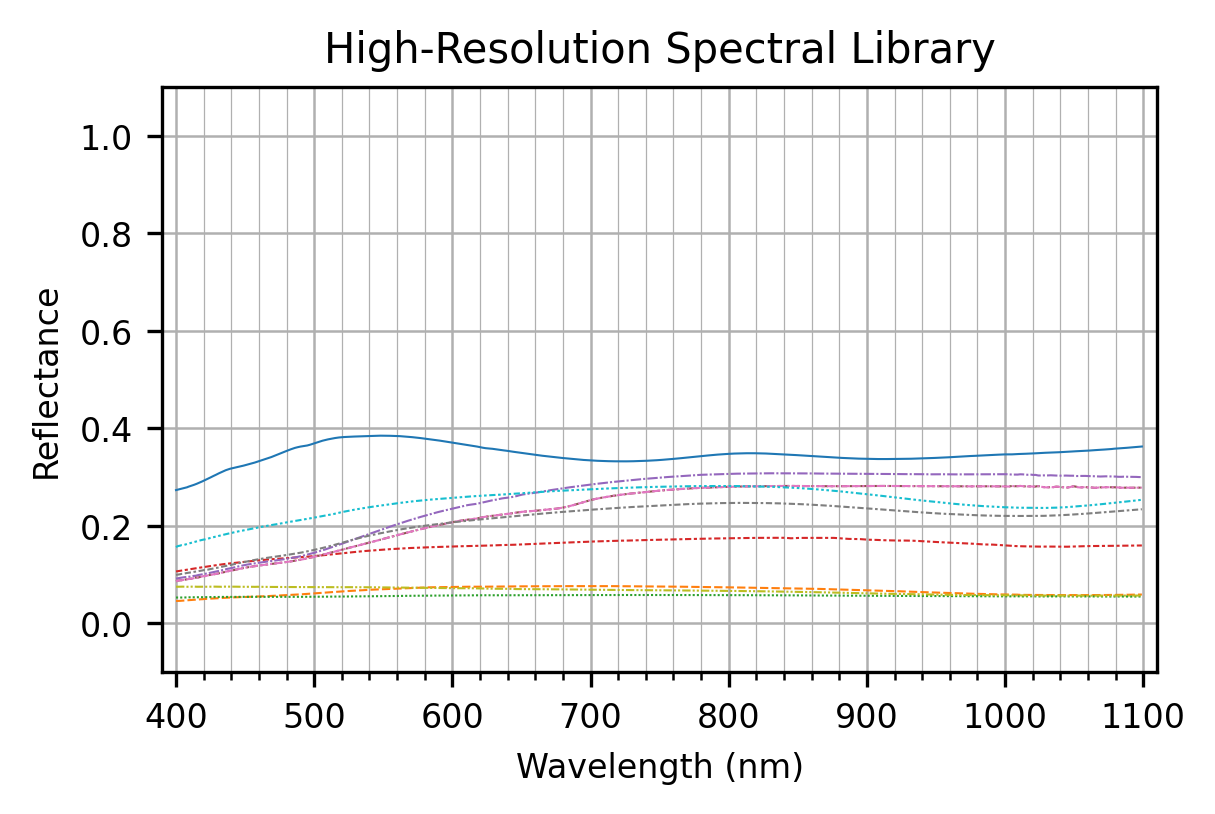

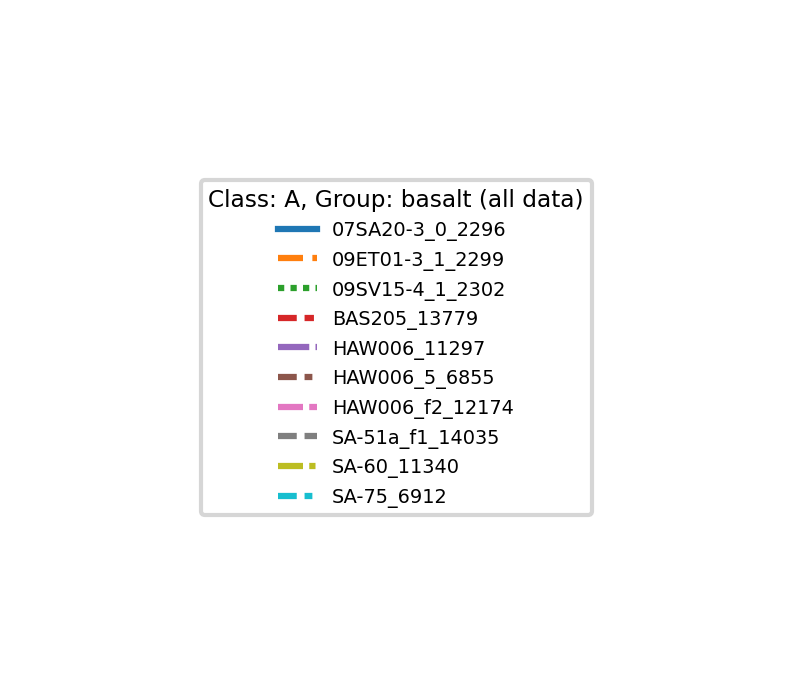

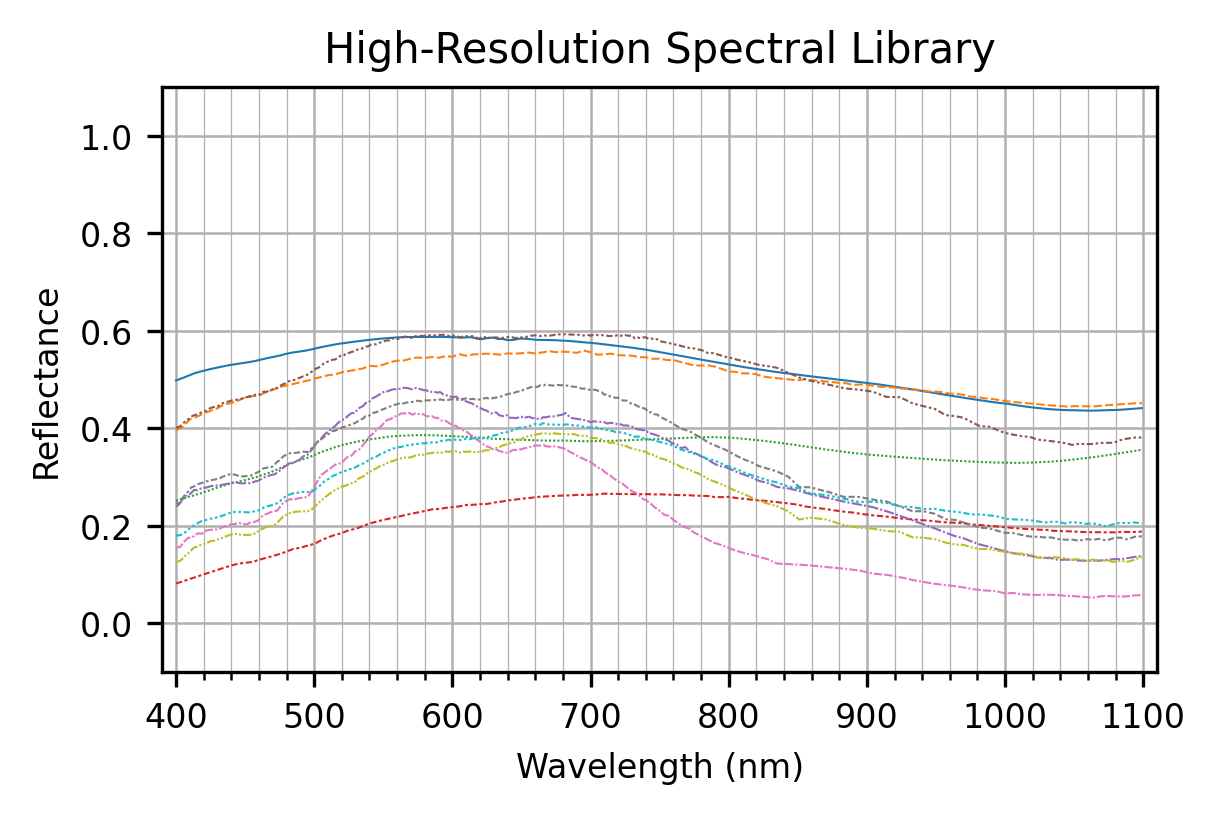

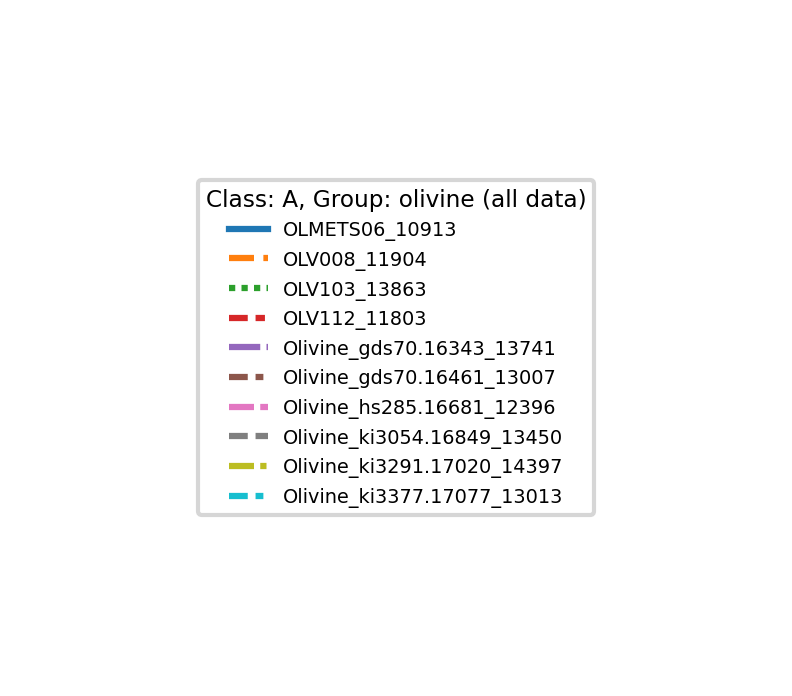

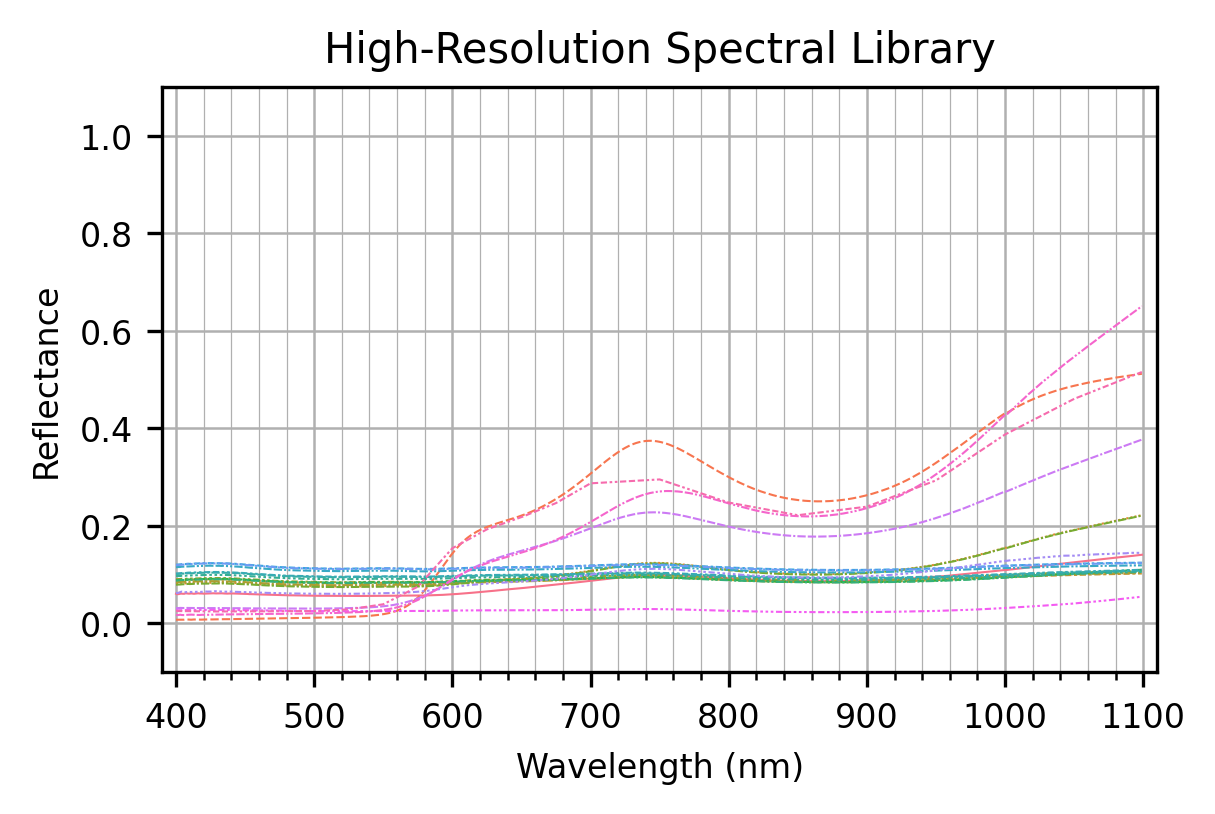

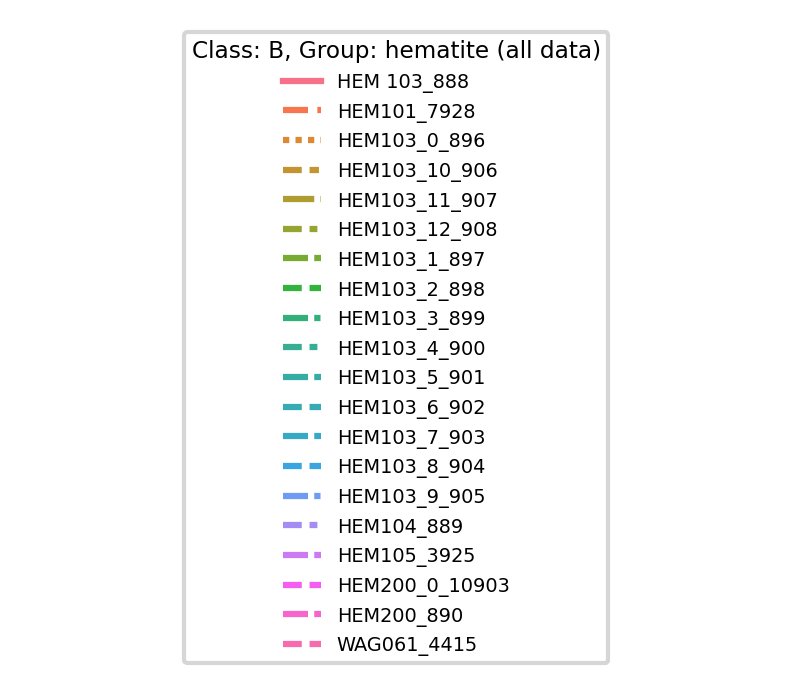

In [9]:
matcol.plot_profiles(categories_only=False)

As we have updated the content of the material collection, we overwrite the previously exported files with a new export:

In [10]:
matcol.export_main_df()

Exporting the Material Collection to CSV and Pickle formats...


The MaterialCollection object for the ```example_spectral_library``` project can now be loaded independently of this notebook. Indeed we will use it in subsequent example notebooks.